In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime, timedelta
from dotenv import load_dotenv

import yfinance as yf
from newsapi import NewsApiClient

load_dotenv()

True

In [90]:
NEWS_API = os.getenv('NEWS_API')

def get_stock_data(ticker="AAPL", start_date="2020-01-01", end_date="2024-01-01", path="../data/stock_data_4years.csv"):
    print(f"Fetching stock data for {ticker} from {start_date} to {end_date}...")
    stock_data = yf.download(ticker, start=start_date, end=end_date) # code to extract stock data
    print(f"Stock data for {ticker} fetched successfully!")
    
    # small summary of fetched stock data
    print(f"Stock data shape: {stock_data.shape}")
    print(f"Date range: {stock_data.index[0]} to {stock_data.index[-1]}")
    print("\nFirst 5 rows:")
    print(stock_data.head())

    print("\nLast 5 rows:")
    print(stock_data.tail())
    
    # save stock data to csv
    stock_data.to_csv(path)
    print(f"Stock data saved to {path}")

def get_news_data(from_date, to_date, api_key=NEWS_API, q="Apple", language="en", sort_by="relevancy", page_size=100, path="../data/news_data.csv"):
    print(f"Fetching news data for query '{q}' from {from_date} to {to_date}...")
    news_api = NewsApiClient(api_key=api_key)
    news = news_api.get_everything(
        q = q,
        from_param = from_date,
        to = to_date,
        language = language,
        sort_by = sort_by,
        page_size = page_size 
    )
    print(f"Found {len(news['articles'])} news articles for query '{q}' from {from_date} to {to_date}")
    
    news_df = pd.DataFrame(news['articles'])
    print(f"News data shape: {news_df.shape}")
    news_df.to_csv(path, index=False)
    print(f"News data saved to {path}")

In [91]:
to_date = datetime.today().date()
from_date = to_date - timedelta(days=30)

get_stock_data()
get_news_data(from_date=from_date, to_date=to_date)

C:\Users\Juls\AppData\Local\Temp\ipykernel_884\4120777063.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start=start_date, end=end_date) # code to extract stock data
[*********************100%***********************]  1 of 1 completed

Fetching stock data for AAPL from 2020-01-01 to 2024-01-01...
Stock data for AAPL fetched successfully!
Stock data shape: (1006, 5)
Date range: 2020-01-02 00:00:00 to 2023-12-29 00:00:00

First 5 rows:
Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.620842  72.681289  71.373218  71.627092  135480400
2020-01-03  71.914825  72.676454  71.689965  71.847125  146322800
2020-01-06  72.487862  72.526549  70.783263  71.034724  118387200
2020-01-07  72.146919  72.753800  71.926892  72.497506  108872000
2020-01-08  73.307510  73.609745  71.849533  71.849533  132079200

Last 5 rows:
Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2023-12-22  192.192566  193.989405  191.567141  1

Found 100 news articles for query 'Apple' from 2025-06-17 to 2025-07-17
News data shape: (100, 8)
News data saved to ../data/news_data.csv


In [92]:
#  import datasets 
news_df = pd.read_csv('../data/news_data.csv')
stock_df = pd.read_csv('../data/stock_data_4years.csv', skiprows=2)

stock_df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

In [ ]:
news_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'the-verge', 'name': 'The Verge'}",Brandt Ranj,The best Apple Watch Prime Day deals,Apple typically doesn’t discount its own hardw...,https://www.theverge.com/tech/698764/best-appl...,https://platform.theverge.com/wp-content/uploa...,2025-07-09T14:03:37Z,Apple typically doesn’t discount its own hardw...
1,"{'id': 'the-verge', 'name': 'The Verge'}","Jay Peters, Barbara Krasnoff",Why I love my Apple EarPods,"Jay Peters is a news editor for The Verge, whi...",https://www.theverge.com/tech/704616/apple-ear...,https://platform.theverge.com/wp-content/uploa...,2025-07-15T14:51:16Z,"Jay Peters is a news editor for The Verge, whi..."
2,"{'id': 'the-verge', 'name': 'The Verge'}",Emma Roth,Apple just added more frost to its Liquid Glas...,Apple’s new Liquid Glass design language just ...,https://www.theverge.com/news/700066/apple-liq...,https://platform.theverge.com/wp-content/uploa...,2025-07-07T22:31:21Z,The latest iOS 26 developer beta makes Apples ...
3,"{'id': 'the-verge', 'name': 'The Verge'}",Sheena Vasani,The MLS Season Pass is 50 percent off ahead of...,Major League Soccer (MLS) is now nearly halfwa...,https://www.theverge.com/tech/696026/mls-seaso...,https://platform.theverge.com/wp-content/uploa...,2025-07-01T18:36:43Z,The MLS Season Pass grants access to this summ...
4,"{'id': 'the-verge', 'name': 'The Verge'}",Cameron Faulkner,Apple Wallet notifications for an F1 movie pro...,Apple poured some good money into making F1 – ...,https://www.theverge.com/news/692276/apple-wal...,https://platform.theverge.com/wp-content/uploa...,2025-06-24T19:15:41Z,While perhaps not as bad as the 2014 U2 debacl...


In [94]:
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

stock_df.head()

,Date,Close,High,Low,Open,Volume
0,2020-01-02,72.620842,72.681289,71.373218,71.627092,135480400
1,2020-01-03,71.914825,72.676454,71.689965,71.847125,146322800
2,2020-01-06,72.487862,72.526549,70.783263,71.034724,118387200
3,2020-01-07,72.146919,72.753800,71.926892,72.497506,108872000
4,2020-01-08,73.307510,73.609745,71.849533,71.849533,132079200


### **Stock data EDA**

In [119]:
print("\n📊 STOCK DATA OVERVIEW")
print(f"Shape: {stock_df.shape}")
print(f"Date range: {stock_df['Date'].iloc[0]} to {stock_df['Date'].iloc[-1]}")
print(f"Columns: {list(stock_df.columns)}")
print(f"Missing values:\n{stock_df.isna().sum()}")

print(f"Number of rows(trading days): {len(stock_df)}")
print(f"Years: {[int(y) for y in sorted(stock_df['Date'].dt.year.unique())]}")


stock_df.describe()


📊 STOCK DATA OVERVIEW
Shape: (1006, 6)
Date range: 2020-01-02 00:00:00 to 2023-12-29 00:00:00
Columns: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
Missing values:
Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64
Number of rows(trading days): 1006
Years: [2020, 2021, 2022, 2023]


,Date,Close,High,Low,Open,Volume
count,1006,1006.000000,1006.000000,1006.000000,1006.000000,1.006000e+03
mean,2021-12-30 11:57:08.230616320,138.377810,139.863375,136.743542,138.247375,9.895211e+07
min,2020-01-02 00:00:00,54.378574,55.379527,51.528408,55.277736,2.404830e+07
25%,2020-12-30 06:00:00,120.763411,122.008179,119.225835,120.869275,6.407675e+07
50%,2021-12-29 12:00:00,143.250969,144.829627,141.584391,143.100283,8.467540e+07
75%,2022-12-28 18:00:00,163.691662,165.974619,162.434231,163.960275,1.155069e+08
max,2023-12-29 00:00:00,196.669769,198.168786,195.567849,196.580427,4.265100e+08
std,NaN,33.459340,33.579798,33.319774,33.453056,5.439653e+07


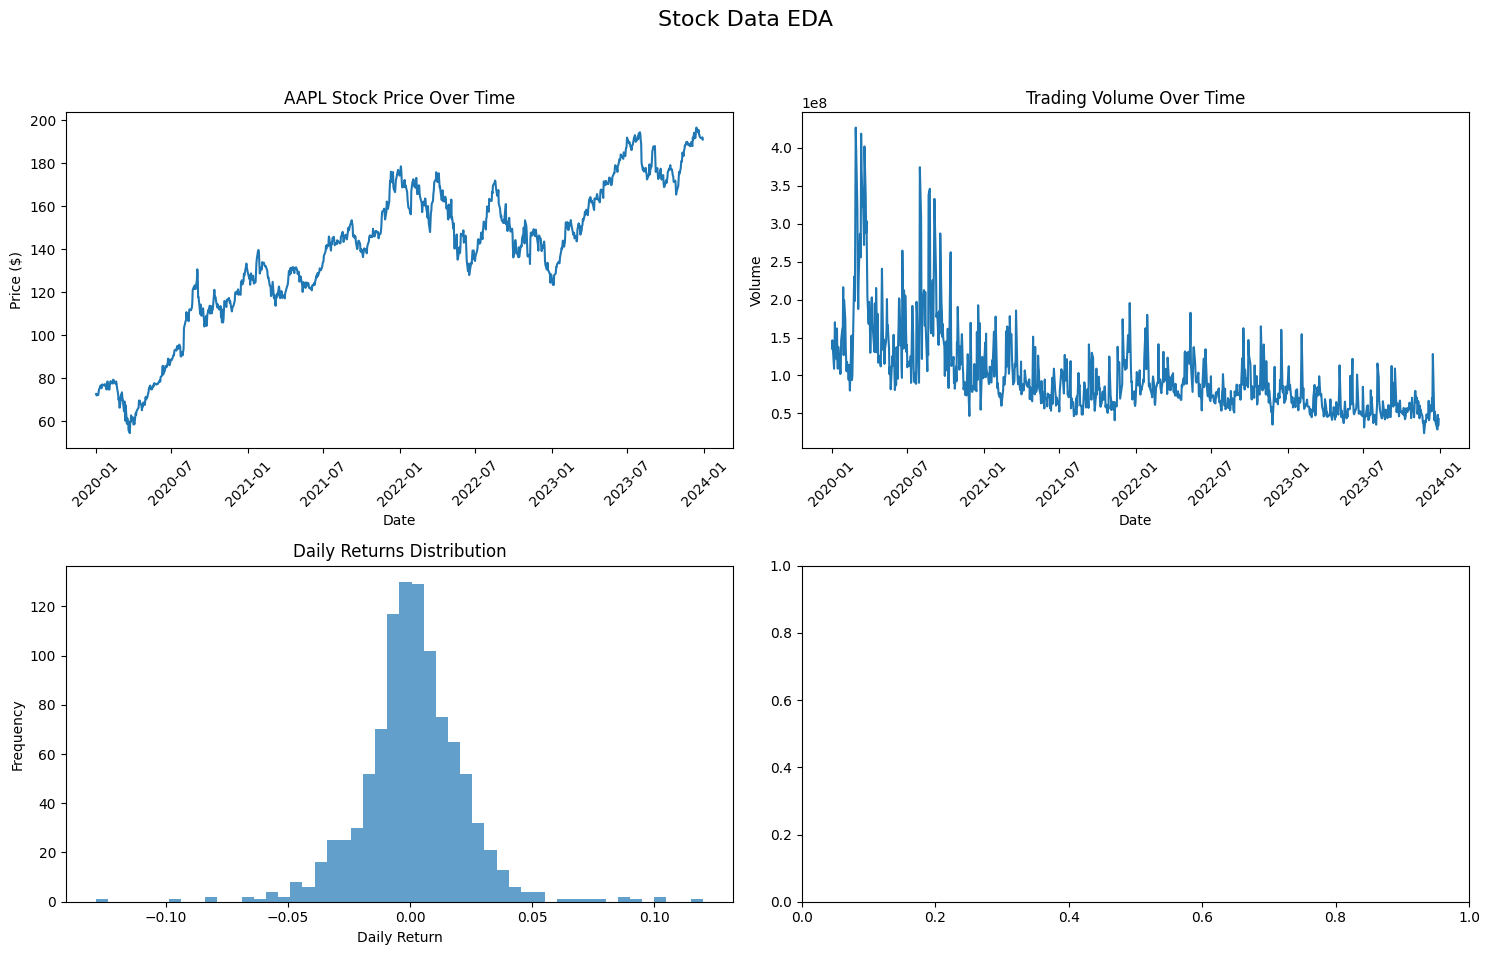

In [123]:
# Make sure Date is in datetime format
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

# Create plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Stock Data EDA', fontsize=16)

# 1. Stock price over time
axes[0, 0].plot(stock_df['Date'], stock_df['Close'])
axes[0, 0].set_title('AAPL Stock Price Over Time')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Price ($)')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Volume over time
axes[0, 1].plot(stock_df['Date'], stock_df['Volume'])
axes[0, 1].set_title('Trading Volume Over Time')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Volume')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Daily returns distribution
stock_df['Daily Return'] = stock_df['Close'].pct_change()
axes[1, 0].hist(stock_df['Daily Return'].dropna(), bins=50, alpha=0.7)
axes[1, 0].set_title('Daily Returns Distribution')
axes[1, 0].set_xlabel('Daily Return')
axes[1, 0].set_ylabel('Frequency')

# Optional: Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### **News data EDA**

In [ ]:
print("\n📊 NEWS DATA OVERVIEW")
print(f"Shape: {news_df.shape}")
print(f"Date range: {news_df['publishedAt'].iloc[0]} to {news_df['publishedAt'].iloc[-1]}")
print(f"Columns: {list(news_df.columns)}")
print(f"Missing values:\n{news_df.isna().sum()}")


📊 NEWS DATA OVERVIEW
Shape: (100, 8)
Date range: 2025-07-09T14:03:37Z to 2025-06-19T16:53:02Z
Columns: ['source', 'author', 'title', 'description', 'url', 'urlToImage', 'publishedAt', 'content']
Missing values:
source         0
author         0
title          0
description    0
url            0
urlToImage     0
publishedAt    0
content        0
dtype: int64
